In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/LG.csv')

In [3]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,3/1/2019,73000.0,72300.0,73775.0,71900.0
1,3/2/2019,73000.0,72300.0,73775.0,71900.0
2,3/3/2019,73000.0,72300.0,73775.0,71900.0
3,3/4/2019,71200.0,70800.0,71800.0,70800.0
4,3/5/2019,71300.0,70900.0,72000.0,70300.0
...,...,...,...,...,...
1915,5/28/2024,109300.0,97300.0,109500.0,97200.0
1916,5/29/2024,110500.0,112500.0,113900.0,109000.0
1917,5/30/2024,106300.0,109500.0,111100.0,106200.0
1918,5/31/2024,104800.0,107500.0,109900.0,104800.0


In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

# Tính Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Tính Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions_xgb)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 1779.2668894759115
Mean Squared Error (MSE): 7150001.505649172
R-squared (R2): 0.9391152408632473
Root Mean Squared Error (RMSE): 2673.948672964605
Mean Absolute Percentage Error (MAPE): 1.7432600255475887%


**Dự đoán 30 ngày tiếp theo**

In [6]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

89557.88
4
1 day input [91220.        88060.        89557.8828125]
1 day output [88158.97]
2 day input [88060.        89557.8828125 88158.96875  ]
2 day output [89104.82]
3 day input [89557.8828125 88158.96875   89104.8203125]
3 day output [88170.06]
4 day input [88158.96875   89104.8203125 88170.0625   ]
4 day output [88286.08]
5 day input [89104.8203125 88170.0625    88286.078125 ]
5 day output [87771.48]
6 day input [88170.0625    88286.078125  87771.4765625]
6 day output [87933.78]
7 day input [88286.078125  87771.4765625 87933.78125  ]
7 day output [87844.01]
8 day input [87771.4765625 87933.78125   87844.0078125]
8 day output [87936.42]
9 day input [87933.78125   87844.0078125 87936.421875 ]
9 day output [87675.69]
10 day input [87844.0078125 87936.421875  87675.6875   ]
10 day output [87765.46]
11 day input [87936.421875  87675.6875    87765.4609375]
11 day output [87675.69]
12 day input [87675.6875    87765.4609375 87675.6875   ]
12 day output [87814.734]
13 day input [87765.46

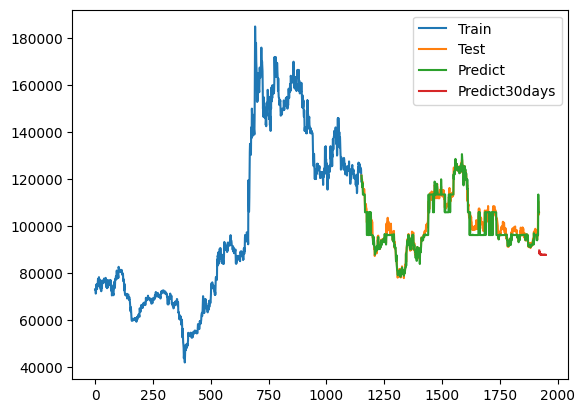

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

**Dự đoán 60 ngày tiếp theo**

In [8]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[:3])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

89557.88
4
1 day input [90060. 91220. 88060.]
1 day output [89557.88]
2 day input [91220.        88060.        89557.8828125]
2 day output [88158.97]
3 day input [88060.        89557.8828125 89557.8828125]
3 day output [89536.56]
4 day input [89557.8828125 89557.8828125 88158.96875  ]
4 day output [88904.55]
5 day input [89557.8828125 88158.96875   89536.5625   ]
5 day output [88170.06]
6 day input [88158.96875  89536.5625   88904.546875]
6 day output [89704.88]
7 day input [89536.5625   88904.546875 88170.0625  ]
7 day output [87917.484]
8 day input [88904.546875  88170.0625    89704.8828125]
8 day output [88905.45]
9 day input [88170.0625    89704.8828125 87917.484375 ]
9 day output [89273.14]
10 day input [89704.8828125 87917.484375  88905.453125 ]
10 day output [87985.09]
11 day input [87917.484375 88905.453125 89273.140625]
11 day output [88549.5]
12 day input [88905.453125 89273.140625 87985.09375 ]
12 day output [88123.77]
13 day input [89273.140625 87985.09375  88549.5     ]
13

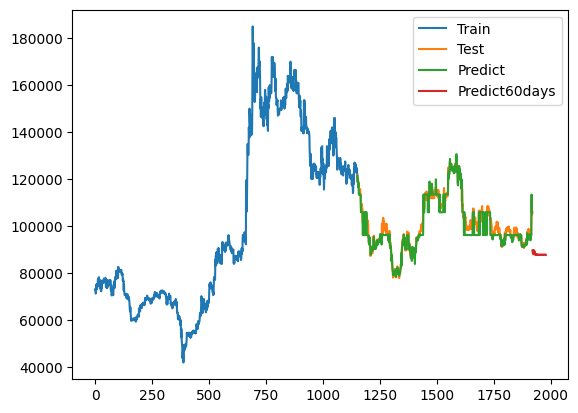

In [9]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

**Dự đoán 90 ngày tiếp theo**

In [10]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

89557.88
4
1 day input [91220.        88060.        89557.8828125]
1 day output [88158.97]
2 day input [88060.        89557.8828125 88158.96875  ]
2 day output [89104.82]
3 day input [89557.8828125 88158.96875   89104.8203125]
3 day output [88170.06]
4 day input [88158.96875   89104.8203125 88170.0625   ]
4 day output [88286.08]
5 day input [89104.8203125 88170.0625    88286.078125 ]
5 day output [87771.48]
6 day input [88170.0625    88286.078125  87771.4765625]
6 day output [87933.78]
7 day input [88286.078125  87771.4765625 87933.78125  ]
7 day output [87844.01]
8 day input [87771.4765625 87933.78125   87844.0078125]
8 day output [87936.42]
9 day input [87933.78125   87844.0078125 87936.421875 ]
9 day output [87675.69]
10 day input [87844.0078125 87936.421875  87675.6875   ]
10 day output [87765.46]
11 day input [87936.421875  87675.6875    87765.4609375]
11 day output [87675.69]
12 day input [87675.6875    87765.4609375 87675.6875   ]
12 day output [87814.734]
13 day input [87765.46

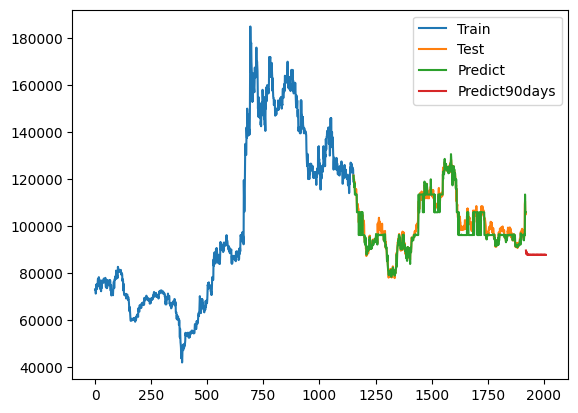

In [11]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()